In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import tree
import seaborn as sns

In [17]:
train=pd.read_csv('train_numerico.csv')

In [18]:
train.head(3)

,Unnamed: 0,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,target
0,0,33,1350,6,1200,2,2.0,1,1,1,0,0,0,5,3,43.5851,-116.2250,13,1
1,1,395,1300,0,1150,3,1.0,1,1,1,0,0,0,5,5,42.2470,-71.7872,19,1
2,2,202,900,4,1200,3,1.0,0,0,0,0,0,0,4,3,44.2354,-70.0288,21,0


In [19]:
X=train[['region', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state']]
y=train.target

***Arbol de decision***

In [20]:
clf = DecisionTreeClassifier(max_depth = 20, random_state = 42)
clf.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [21]:
y_pred = clf.predict(X.values)
print(accuracy_score(y,y_pred))

0.9797934366150258


In [40]:
print(recall_score(y,y_pred))

0.9680338693389264


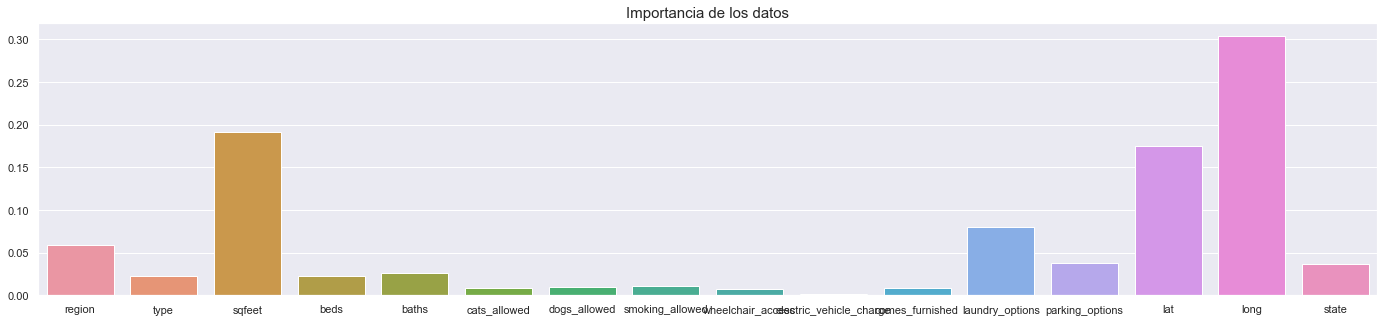

In [27]:
plt.figure(figsize = (24,5)) 
sns.barplot(x = X.columns, y = clf.feature_importances_)
plt.title('Importancia de los datos', fontsize = 15)
plt.show()

In [29]:
test=pd.read_csv('test_numerico.csv')

In [32]:
X_test=test[['region', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state']]
y_pred_test= clf.predict(X_test.values)

In [34]:
y_pred_test.shape

(38498,)

In [35]:
resultado=pd.DataFrame(y_pred_test, columns=['pred'])

In [36]:
resultado.head(5)

,pred
0,0
1,0
2,1
3,1
4,0


In [37]:
resultado.to_csv('elgualas.csv',index=False)